# Workshop FME ZeMe - 9$^{th}$ Dec. 2025
**FME ZeMe - Zero Emission Metal Production**  
*Norwegian Research Centre for Sustainable Metallurgy*
## Plotting and Statistics in Python
*Tomáš Mánik, IMA, NTNU*

---

### Learning Outcomes

By the end of the workshop, participants will be able to:

- Load, inspect, and filter data using Pandas.
- Create and customize 2D and 3D plots to visualize data.
- Apply basic smoothing and filtering to noisy data.
- Fit and interpret linear and non-linear regression models in Python.
- Explore variability using histograms and other distribution plots.



---
### Content
**1. Introduction to Pandas DataFrame & Simple Plotting**
   - Dataset: *Ferroalloy Global Production*
   - Covariance and Correlation
   - Exploratory Data Analysis

**2. Data filtering and differentiation**
   - Dataset: *Solidification of Aluminium*
   - Savitzky-Golay filter
   - Butterworth filter

**3. Linear and Non-linear regression**
   - Dataset: *Arrhenius equation*
   - Confidence and prediction band
   - Multivariate regression

**4. 3D visualization**
   - Scatter and Surface plot
   - Contour plot

**5. Exploring Variability**
   - Dataset: *Grain size, hardness, heat treatment of ferritic steel*
   - Histograms
   - Kernel density estimates (KDE) (smooth distribution estimates)
   - Violin plots
   - 2D-Histograms
   - `pairplot` and `jointplot`

---
### A practical things to remeber

* any text after the `#` sign is a comment
* for better navigation, every cell is numbered as #1, #2, ...
* lines in each cell are numbered
* press `SHIFT + ENTER` to run a cell
* columnwise selection -> `SHIFT + ALT + drag the mouse straight down`

### Import the libraries

In [136]:
#1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

---
# Part 1: Introduction to Pandas & Simple Plotting

## 1.1   Ferroalloy Global Production

World data on Ferroalloy Global Production can be found here   
<https://datasource.kapsarc.org/explore/dataset/production-of-ferro-alloys>

Export the csv file from the webpage above

In [137]:
#2
# Our base URL for the input files for this Workshop
base_url = "https://raw.githubusercontent.com/TomasManik/FME-ZeMe-DigiWorkshop2025/refs/heads/main/data/"

In [138]:
#3
# Load ferroalloy production data
df = pd.read_csv(base_url + "production-of-ferro-alloys.csv", sep=';')

In [139]:
#4
print(df.head(10))

          Country           Sub-commodity  Year  Production
0             USA            Ferro-chrome  1983     18078.0
1             USA     Ferro-silico-chrome  1983     14942.0
2             USA           Ferro-silicon  1983    284958.0
3  United Kingdom         Ferro-manganese  1983     82800.0
4       Venezuela           Ferro-silicon  1983     46636.0
5      Yugoslavia            Ferro-nickel  1983      3000.0
6        Zimbabwe         Ferro-manganese  1983      2085.0
7         Albania            Ferro-chrome  1984     40000.0
8       Argentina         Ferro-manganese  1984     28016.0
9       Argentina  Ferro-silico-manganese  1984     13336.0


In [140]:
#5
df.shape

(7930, 4)

In [141]:
#6
df.columns

Index(['Country', 'Sub-commodity', 'Year', 'Production'], dtype='object')

In [142]:
#7
df['Country'].unique()

array(['USA', 'United Kingdom', 'Venezuela', 'Yugoslavia', 'Zimbabwe',
       'Albania', 'Argentina', 'Australia', 'Brazil', 'Canada', 'China',
       'Dominican Republic', 'Egypt', 'Finland', 'France',
       'German Democratic Rep', 'German Federal Republic', 'Italy',
       'Japan', 'Korea (Rep. of)', 'Norway', 'Poland', 'Portugal',
       'Romania', 'South Africa', 'Soviet Union', 'Sweden', 'Austria',
       'Bulgaria', 'Chile', 'Czechoslovakia', 'India', 'Philippines',
       'Spain', 'Taiwan', 'Turkey', 'Belgium', 'Hungary', 'Iceland',
       'Indonesia', 'Switzerland', 'Greece', 'Korea, Dem. P.R. of',
       'Thailand', 'Mexico', 'Germany', 'Croatia', 'North Macedonia',
       'Slovenia', 'Ukraine', 'Bosnia & Herzegovina', 'Colombia',
       'Georgia', 'Kazakhstan', 'Russia', 'Iran', 'Serbia and Montenegro',
       'New Caledonia', 'Slovakia', 'Bhutan', 'Czech Republic',
       'Eswatini (Swaziland)', 'Armenia', 'Kosovo', 'Gabon', 'Vietnam',
       'Bahrain', 'Myanmar'], dtype=o

In [143]:
# 8
df[df['Country'] == 'USA']

,Country,Sub-commodity,Year,Production
0,USA,Ferro-chrome,1983,18078.0
1,USA,Ferro-silico-chrome,1983,14942.0
2,USA,Ferro-silicon,1983,284958.0
67,USA,Ferro-phosphorus,1985,56211.0
103,USA,Ferro-phosphorus,1986,52750.0
...,...,...,...,...
7668,USA,Ferro-silico-chrome,1979,43221.0
7705,USA,Ferro-chrome,1980,167292.0
7706,USA,Ferro-silico-manganese,1980,170838.0
7707,USA,Other ferro-alloys,1980,114509.0


In [144]:
#9
df[(df['Country'] == 'USA') & (df['Sub-commodity'] == 'Ferro-manganese')]

,Country,Sub-commodity,Year,Production
142,USA,Ferro-manganese,1987,102462.0
1066,USA,Ferro-manganese,1974,493836.0
1274,USA,Ferro-manganese,1980,171886.0
1596,USA,Ferro-manganese,1983,77954.0
1629,USA,Ferro-manganese,1984,155246.0
2796,USA,Ferro-manganese,1975,522365.0
3191,USA,Ferro-manganese,1981,174805.0
4307,USA,Ferro-manganese,1971,689366.0
4408,USA,Ferro-manganese,1976,437864.0
4478,USA,Ferro-manganese,1978,247235.0


In [145]:
#10
df2 = df[(df['Country'] == 'USA') & (df['Sub-commodity'] == 'Ferro-manganese')]

In [146]:
#11
df2['Year']

,Year
142,1987
1066,1974
1274,1980
1596,1983
1629,1984
2796,1975
3191,1981
4307,1971
4408,1976
4478,1978


In [147]:
#12
df2['Production']

,Production
142,102462.0
1066,493836.0
1274,171886.0
1596,77954.0
1629,155246.0
2796,522365.0
3191,174805.0
4307,689366.0
4408,437864.0
4478,247235.0


Text(0.5, 1.0, 'FerroManganese Production')

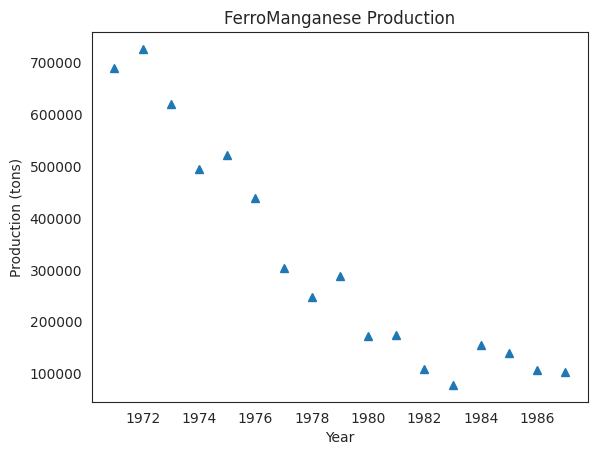

In [148]:
#13
plt.plot(df2['Year'], df2['Production'],'^')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.title('FerroManganese Production')

### Plot production for several countries

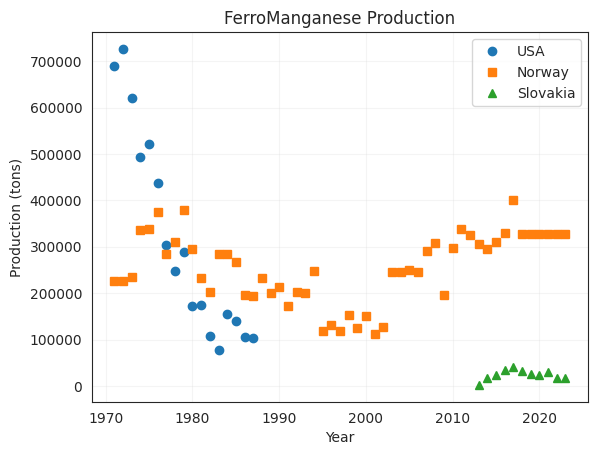

In [149]:
#14
for (country, marker) in zip(['USA', 'Norway', 'Slovakia'], ['o','s','^']):
    df3 = df[(df['Country'] == country) & (df['Sub-commodity'] == 'Ferro-manganese')]
    plt.plot(df3['Year'], df3['Production'], marker, label=country)
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.title('FerroManganese Production')
plt.grid(True, alpha=0.2)
plt.legend()

### Plot production for several countries AND two commodities

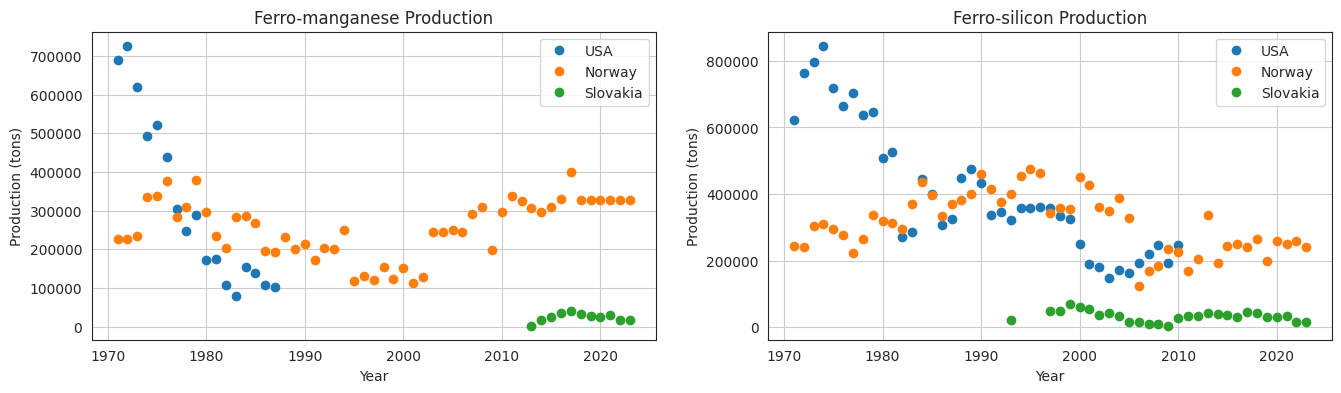

In [150]:
#15
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

for country in ['USA', 'Norway', 'Slovakia']:
    df4 = df[(df['Country'] == country) & (df['Sub-commodity'] == 'Ferro-manganese')]
    ax[0].plot(df4['Year'], df4['Production'], 'o', label=country)

    df4 = df[(df['Country'] == country) & (df['Sub-commodity'] == 'Ferro-silicon')]
    ax[1].plot(df4['Year'], df4['Production'], 'o', label=country)

ax[0].set_xlabel('Year')
ax[0].set_ylabel('Production (tons)')
ax[0].set_title('Ferro-manganese Production')
ax[0].grid(True)
ax[0].legend()

ax[1].set_xlabel('Year')
ax[1].set_ylabel('Production (tons)')
ax[1].set_title('Ferro-silicon Production')
ax[1].grid(True)
ax[1].legend()

* adjust better units
* fix common y-axis
* add the line (need to sort the data)
* add one more sub-commodity and redo plotting even more general

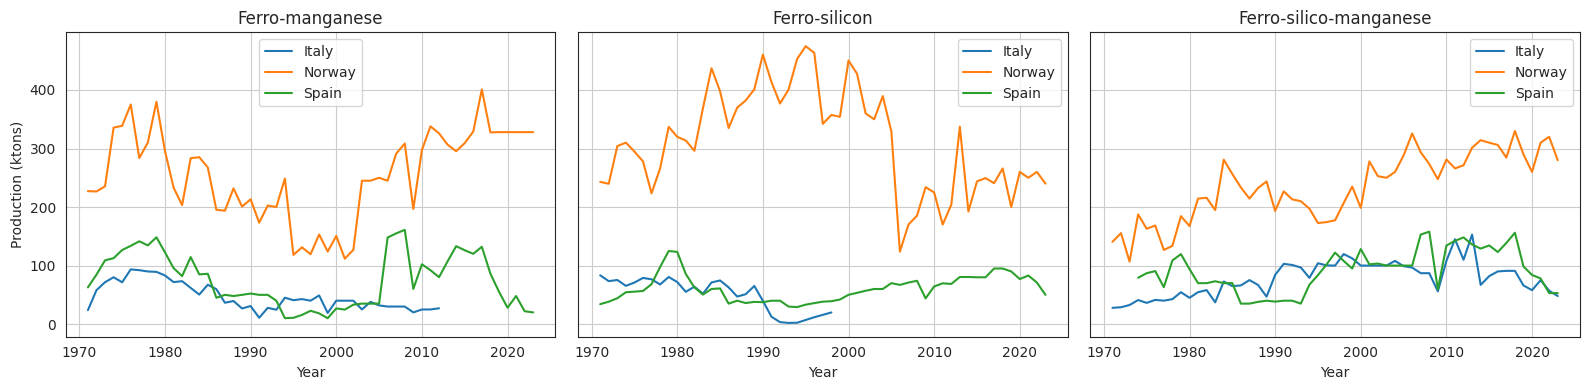

In [151]:
#16
countries = ['Italy', 'Norway', 'Spain']
commodities = ['Ferro-manganese', 'Ferro-silicon', 'Ferro-silico-manganese']

fig, ax = plt.subplots(nrows=1, ncols=len(commodities), figsize=(16,4), sharey=True)

for i, commodity in enumerate(commodities):
    for country in countries:
        df5 = df[(df['Country'] == country) & (df['Sub-commodity'] == commodity)].sort_values(by='Year')
        ax[i].plot(df5['Year'], df5['Production']/1000, '-', label=country)
    ax[i].set_xlabel('Year')
    ax[i].set_title(commodity)
    ax[i].grid(True)
    ax[i].legend()

ax[0].set_ylabel('Production (ktons)')
plt.tight_layout()

## 1.2 Covariance and Correlation

* choose one commodity and five countries
* calculate the covariance and correlation matrix
* visualize it

#### Covariance

Covariance measures how two variables change together. For variables $X$ and $Y$, the sample covariance is:

$$
\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})
$$


where $ \bar{X} $ and $ \bar{Y} $ are sample means.

A **covariance matrix** summarizes covariances between pairs of variables in a dataset as

$$
\mathbf{Cov}(X) =
\begin{pmatrix}
\text{Cov}(X_1, X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_n) \\
\text{Cov}(X_2, X_1) & \text{Cov}(X_2, X_2) & \cdots & \text{Cov}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_n, X_1) & \text{Cov}(X_n, X_2) & \cdots & \text{Cov}(X_n, X_n) \\
\end{pmatrix}
$$

---

##### Where Is the Covariance Matrix Typically Used?
* is a measure for how strong the linear relationship between two variables is
* one of the main ingredients for finding the linear "fit" - the regression line - in a closed form solution
* estimates **redundancy** - if $X_1$ is a linear function of $X_2$, it does not add any new information
* is basis for **PCA** (principal component analysis)
* to do **dimensionality reduction** - belongs to **unsupervised machine learning**
* is affected by variable scales/units - difficult to interpret of how strong the dependecy is

#### Correlation

The **correlation coefficient** $ \rho_{X,Y} $ provides a normalized, dimensionless measure of linear association:

$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

where $ \sigma_X $ and $ \sigma_Y $ are the standard deviations of $X$ and $Y$.

A **correlation matrix** replaces each covariance with the corresponding correlation coefficient, ranging from -1 (perfect negative) to 1 (perfect positive correlation):

$$
\mathbf{Corr}(X) =
\begin{pmatrix}
\rho_{X_1, X_1} & \rho_{X_1, X_2} & \cdots & \rho_{X_1, X_n} \\
\rho_{X_2, X_1} & \rho_{X_2, X_2} & \cdots & \rho_{X_2, X_n} \\
\vdots & \vdots & \ddots & \vdots \\
\rho_{X_n, X_1} & \rho_{X_n, X_2} & \cdots & \rho_{X_n, X_n} \\
\end{pmatrix}
$$


* correlation is unitless (normalized)
* the matrix is symmetric (as well as the covariance matrix)
* +1  means perfect positive linear correlation
* -1  means perfect negative linear correlation
* 0  variables are uncorrelated

In [152]:
#17
countries = ["India", "Italy", "Mexico", "Norway", "Spain"]
df1 = df[(df['Country'].isin(countries)) & (df['Sub-commodity'] == 'Ferro-silico-manganese')]
df1 = df1[['Country','Year', 'Production']]

In [153]:
#18
df1

,Country,Year,Production
28,Norway,1984,280953.0
52,India,1985,13544.0
53,Italy,1985,64858.0
97,Spain,1986,35000.0
137,Spain,1987,35000.0
...,...,...,...
7899,India,2022,344000.0
7901,Italy,2022,57000.0
7919,India,2023,353595.0
7921,Italy,2023,48000.0


In [154]:
#19
df2 = pd.pivot_table(df1, index='Year', columns='Country', values='Production')

In [155]:
#20
df2.head(10)

Country,India,Italy,Mexico,Norway,Spain
Year,,,,,
1971,NaN,27818.0,5991.0,140560.0,NaN
1972,NaN,28798.0,11929.0,155449.0,NaN
1973,NaN,32633.0,12306.0,106825.0,NaN
1974,NaN,41100.0,14351.0,187443.0,79241.0
1975,NaN,36289.0,15720.0,162860.0,86944.0
1976,4689.0,41386.0,17580.0,168476.0,90610.0
1977,10240.0,40050.0,26911.0,126694.0,63070.0
1978,2891.0,42615.0,33735.0,133647.0,108685.0
1979,5282.0,54513.0,31037.0,184415.0,119570.0


In [156]:
#21
df2_clean = df2.dropna()/1000 # into ktonnes

In [157]:
#22
df2_clean.cov()

Country,India,Italy,Mexico,Norway,Spain
Country,,,,,
India,84775.856332,1998.377512,5942.454697,7672.861289,4361.089744
Italy,1998.377512,720.328318,491.738260,407.493102,421.609007
Mexico,5942.454697,491.738260,2069.763512,1749.914156,746.709515
Norway,7672.861289,407.493102,1749.914156,2727.102189,652.298708
Spain,4361.089744,421.609007,746.709515,652.298708,1359.178131


In [158]:
#23
df2_clean.corr()

Country,India,Italy,Mexico,Norway,Spain
Country,,,,,
India,1.000000,0.255727,0.448610,0.504627,0.406276
Italy,0.255727,1.000000,0.402725,0.290740,0.426095
Mexico,0.448610,0.402725,1.000000,0.736556,0.445198
Norway,0.504627,0.290740,0.736556,1.000000,0.338811
Spain,0.406276,0.426095,0.445198,0.338811,1.000000


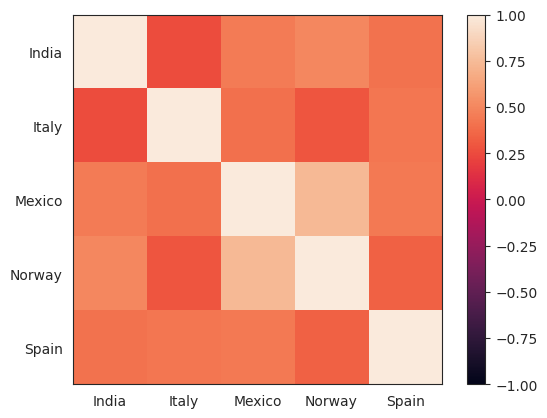

In [159]:
#24
im = plt.imshow(df2_clean.corr(), vmin=-1, vmax=1)   #

plt.xticks(ticks=[0,1,2,3,4], labels=countries)
plt.yticks(ticks=[0,1,2,3,4], labels=countries)
plt.colorbar(im)

Text(0.5, 1.01, 'Ferro-silico-manganese Production for 5 Countries')

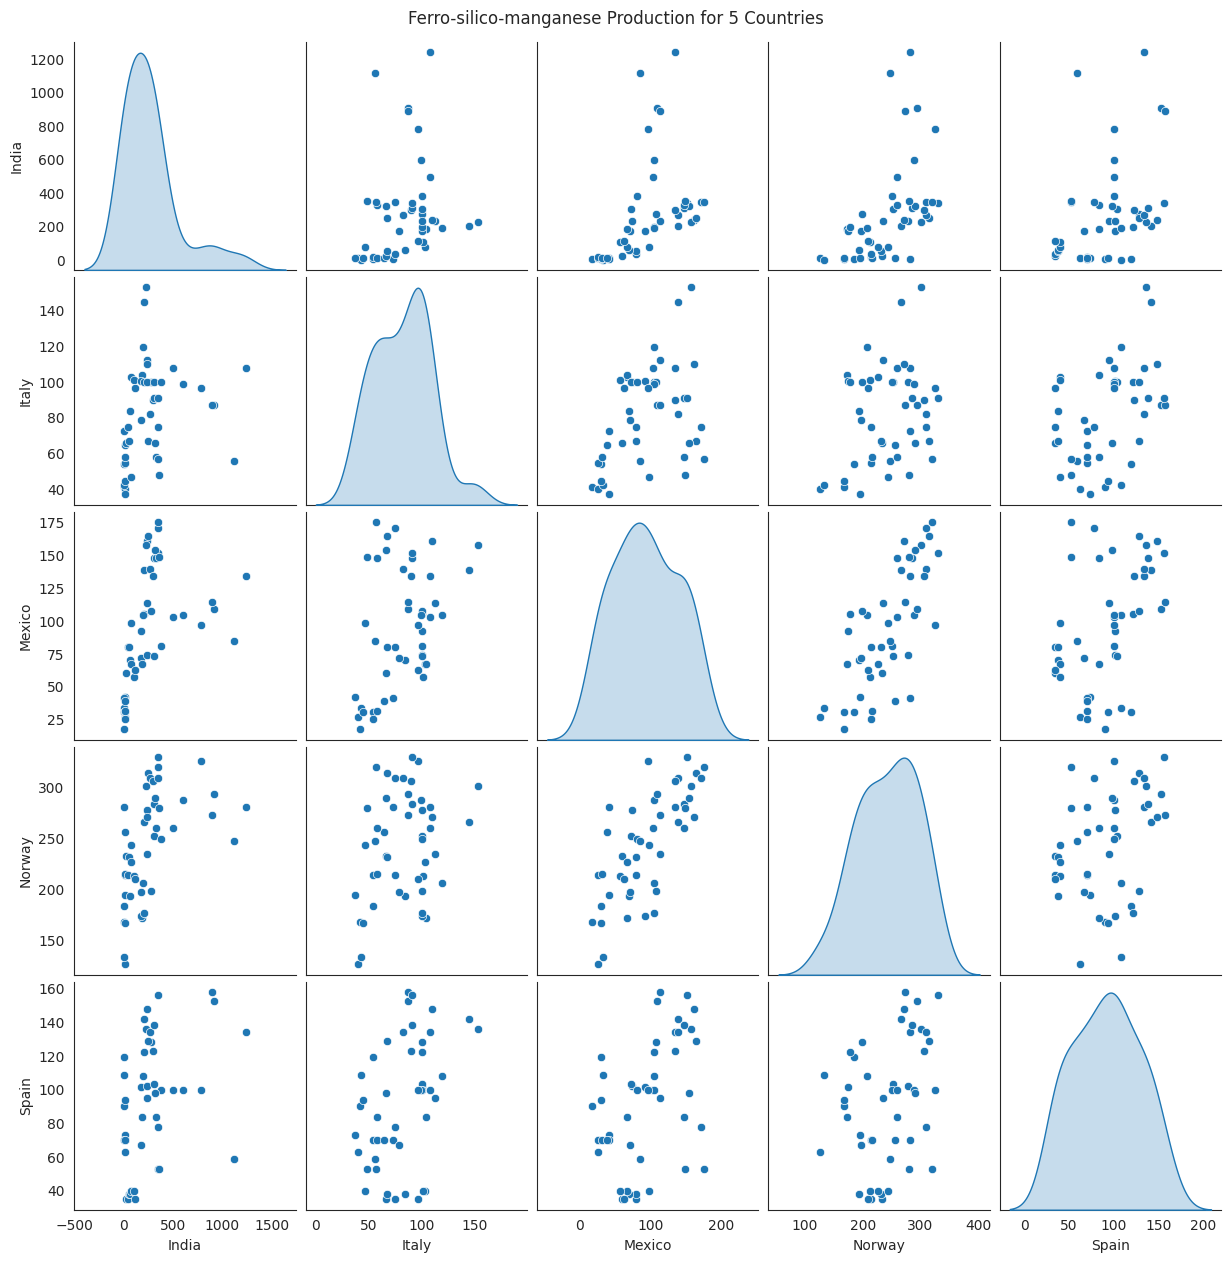

In [160]:
#25
import seaborn as sns
# Scatter matrix
sns.pairplot(df2_clean, diag_kind='kde')   #
plt.suptitle('Ferro-silico-manganese Production for 5 Countries', y=1.01)

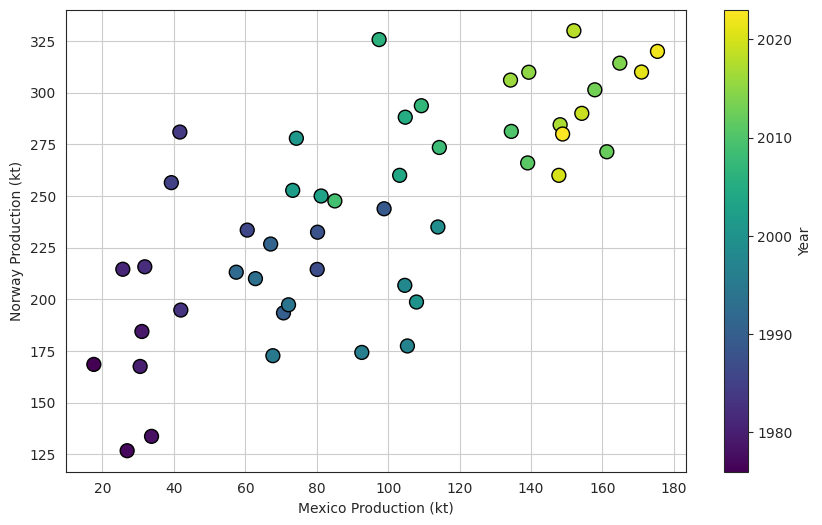

In [161]:
#26
plt.figure(figsize=(10, 6))
plt.scatter(df2_clean['Mexico'], df2_clean['Norway'], s=100, c=df2_clean.index, cmap='viridis', edgecolors='black')
plt.colorbar(label='Year')
plt.xlabel('Mexico Production (kt)')
plt.ylabel('Norway Production (kt)')
plt.grid(True)

## 1.3 Exploratory Data Analysis

*Exploratory data analysis is an attitude, a state of flexibility, \
a willingness to look for those things that we believe are not there, \
as well as those we believe to be there.*

John Tukey (1915–2000)

American mathematician and statistician

* how does my data look like?
* which region they cover?
* are any data missing? NANs?
* do we have outliers?
* are there any patterns?
* are data clustered around a certain point?
* are there any correlations between variables?

#### Descriptive statistics - measures of
   * frequency ("25% of all my data for the first attribute are less than zero")
   * the central tendency (**mean** ($1^{th}$ raw moment), **median**, the mode (*uni-, bi-, multi-modal*))
   * dispersion or the variability (**variance** ($2^{th}$ central moment), **standard deviation**, **min** and **max**)
   * measures of the shape - asymmetric data? -> **skewness** ($3^{th}$ central moment), fat tail? -> **kurtosis** ($4^{th}$ central moment)
   * measures of the dependency of variables (**correlation**)

#### Data Visualization
   * must complement the above!
   * *Anscombe’s quartet* -> a very educative example by the statistician F. ANSCOMBE from 1973

In [162]:
#27
df = pd.read_csv(base_url + 'anscombe_quartet.csv')

In [163]:
#28
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [164]:
#29
df.mean()

,0
x1,9.000000
y1,7.500909
x2,9.000000
y2,7.500909
x3,9.000000
y3,7.500000
x4,9.000000
y4,7.500909


In [165]:
#30
np.diag(df.cov())

array([11.        ,  4.12726909, 11.        ,  4.12762909, 11.        ,
        4.12262   , 11.        ,  4.12324909])

No. of observations of X and Y:  11 11
Mean of X and Y:  9.0 7.5
Sample variance of X and Y: 11.00 4.13
Correlation between X and Y:  0.82
Slope and intercept: 0.50, 3.00

No. of observations of X and Y:  11 11
Mean of X and Y:  9.0 7.5
Sample variance of X and Y: 11.00 4.13
Correlation between X and Y:  0.82
Slope and intercept: 0.50, 3.00

No. of observations of X and Y:  11 11
Mean of X and Y:  9.0 7.5
Sample variance of X and Y: 11.00 4.12
Correlation between X and Y:  0.82
Slope and intercept: 0.50, 3.00

No. of observations of X and Y:  11 11
Mean of X and Y:  9.0 7.5
Sample variance of X and Y: 11.00 4.12
Correlation between X and Y:  0.82
Slope and intercept: 0.50, 3.00



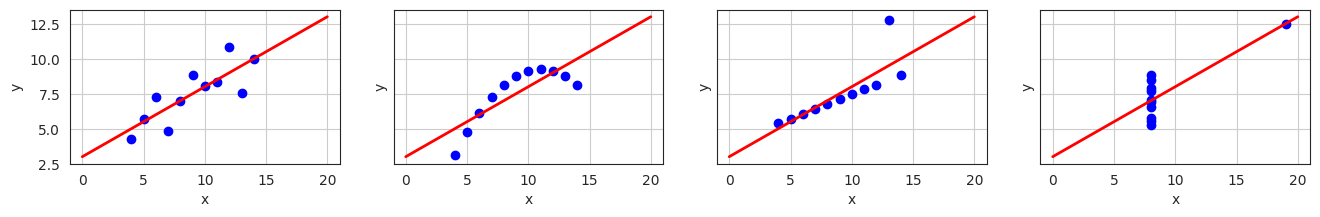

In [166]:
#31
fig, axes = plt.subplots(1, 4, figsize=(16, 2), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    x = df[f'x{i+1}']
    y = df[f'y{i+1}']
    # Scatter plot
    ax.plot(x, y, 'bo')
    slope, intercept = np.polyfit(x, y, 1)
    xfit = np.linspace(0, 20, 100)
    ax.plot(xfit, intercept + slope * xfit, color='red', lw=2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    print('No. of observations of X and Y: ', len(x), len(y))
    print('Mean of X and Y: ', round(np.mean(x),2), round(np.mean(y),2))
    print('Sample variance of X and Y: %.2f %.2f' % (np.var(x,ddof=1), np.var(y,ddof=1)))
    print('Correlation between X and Y:  {:.2f}'.format(np.corrcoef(x,y)[0,1]))
    print(f'Slope and intercept: {slope:.2f}, {intercept:.2f}')
    print()

* each of them has $n = 11$ observations
* the mean of each X is exactly $\bar{x} = 9$
* the mean of each Y is $\bar{y} = 7.5$
* the sample variance of each X is exactly $\sigma_X = 11$
* the sample variance of each Y is $\sigma_Y = 4.13$
* the correlation coefficient between any pair of X and Y is Cor$(X,Y) = 0.82$
* fitting a line to the data always gives the equation $Y = 0.5 X + 3.0$

### Datasaurus dozen

Similar to Anscombe's quartet, the Datasaurus dozen was designed to further illustrate the importance of looking at a set of data graphically before starting to analyze according to a particular type of relationship, and the inadequacy of basic statistic properties for describing realistic data sets.

![datasaurus1.jpg](https://github.com/TomasManik/FME-ZeMe-DigiWorkshop2025/blob/main/data/datasaurus1.jpg?raw=1)

---
# Part 2: Data filtering and differentiation

## 2.1 Solidification of Aluminium

The info on the txt file:
* first raw - the total time $T_{max}$
* followed by rows containing voltage in (V) for evenly distributed times between $0$ and $T_{max}$
* the conversion voltage (V) -> temperature (C) is as: $T=V\cdot 275.5 - 79$

In [167]:
#1
df = pd.read_csv(base_url + 'thermocouple_data.txt')

In [168]:
#2
df

,511.00
0,2.563894
1,2.561174
2,2.558453
3,2.555733
4,2.553049
...,...
845,1.713767
846,1.712715
847,1.711627
848,1.710793


In [169]:
#3
data = np.loadtxt(base_url + 'thermocouple_data.txt')

In [170]:
#4
data

array([511.      ,   2.563894,   2.561174,   2.558453,   2.555733,
         2.553049,   2.550329,   2.547608,   2.544924,   2.542204,
         2.539774,   2.537053,   2.534623,   2.531903,   2.529473,
         2.526752,   2.524322,   2.521602,   2.519172,   2.516741,
         2.514311,   2.511881,   2.509415,   2.506984,   2.504554,
         2.501834,   2.499658,   2.497227,   2.494797,   2.492367,
         2.489937,   2.487471,   2.48504 ,   2.48261 ,   2.480434,
         2.478004,   2.475827,   2.473397,   2.470967,   2.468537,
         2.466361,   2.46393 ,   2.461464,   2.459034,   2.456858,
         2.454718,   2.452251,   2.449821,   2.447645,   2.445505,
         2.443038,   2.440898,   2.438468,   2.436292,   2.434115,
         2.431939,   2.429509,   2.427333,   2.425193,   2.423016,
         2.42084 ,   2.41841 ,   2.416234,   2.414057,   2.411917,
         2.409741,   2.407565,   2.405389,   2.403249,   2.401072,
         2.398896,   2.39672 ,   2.394834,   2.392657,   2.390

In [171]:
#5
Tmax = data[0]
V = data[1:]
t = np.linspace(0, Tmax, len(V))
T = V*275.5 - 79

Text(0, 0.5, 'Temperature (C)')

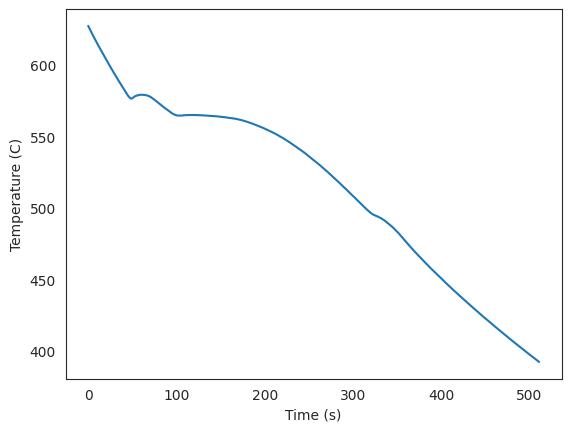

In [172]:
#6
plt.plot(t,T)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')

In [173]:
#7
dTdt = np.diff(T)/np.diff(t)

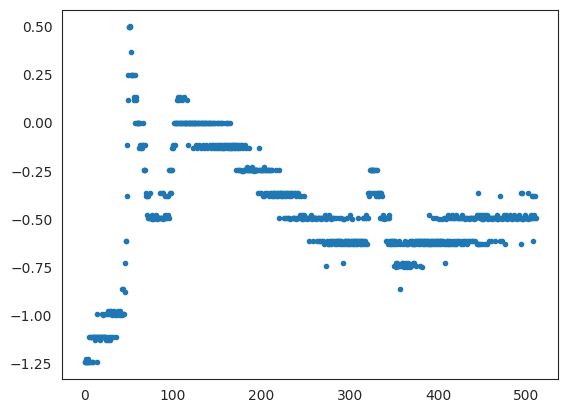

In [174]:
#8
plt.plot(t[:-1], dTdt, '.')

## 2.2 Savitzky-Golay filter (1964).

The Savitzky-Golay filter$^1$ is a digital filter used for smoothing noisy data while preserving the shape and height of signal features such as peaks and valleys.

[1]: Savitzky, A. & Golay, M. J. E. (1964). "Smoothing and Differentiation of Data by Simplified Least Squares Procedures." *Analytical Chemistry*, 36(8), 1627–1639. [https://doi.org/10.1021/ac60214a047](https://doi.org/10.1021/ac60214a047)

### How it works:
1. For each data point, a window of neighboring values is selected (window size, e.g. 5, 7, or more).
2. A polynomial of a chosen degree (commonly 2 or 3) is least-squares fitted to all points in the window.
3. The center point is replaced with the polynomial value at that location.
4. The window slides over the entire data series, repeating the process for every data point.

### Advantages:
* Preserves important features (like peak width and height) better than standard moving averages.
* Can be tuned for different types of noise and signal shapes by choosing the window size and polynomial degree.
* Calculation of smoothed derivatives of a signal is simple (by evaluating derivatives of the fitted polynomial).

![savgol.jpg](https://github.com/TomasManik/FME-ZeMe-DigiWorkshop2025/blob/main/data/savgol.jpg?raw=1)

The Savitzky-Golay smoothing equation for a cubic (third-order) polynomial over a 7-point window is:

$$\tilde{y}_n = \frac{-2y_{n-3} + 3y_{n-2} + 6y_{n-1} + 7y_{n} + 6y_{n+1} + 3y_{n+2} - 2y_{n+3}}{21}$$


In [175]:
#9
# Import Savitzky-Golay filter
from scipy.signal import savgol_filter, savgol_coeffs

In [176]:
#10
savgol_coeffs(window_length=7, polyorder=3) #*21

array([-0.0952381 ,  0.14285714,  0.28571429,  0.33333333,  0.28571429,
        0.14285714, -0.0952381 ])

In [177]:
#11
WL, P = 30, 2

Tf = savgol_filter(T, window_length=WL, polyorder=P)

dTdt2 = savgol_filter(T, window_length=2, polyorder=1, deriv=1)
dTdtf = savgol_filter(T, window_length=WL, polyorder=P, deriv=1)

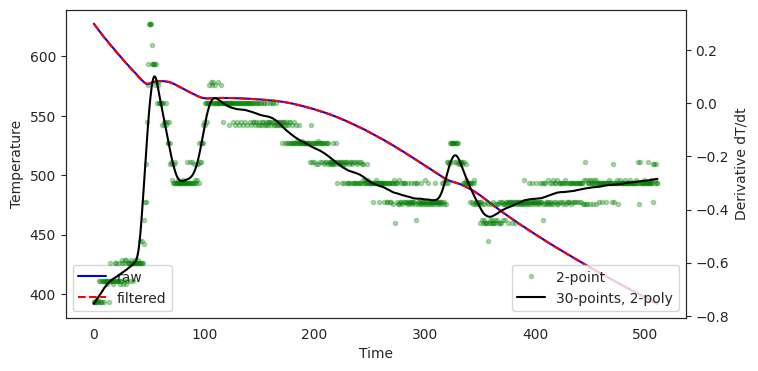

In [178]:
#12
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(t,T, 'b', label='raw')
ax1.plot(t,Tf,'r--', label='filtered')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature')
ax1.legend(loc='lower left')

ax2 = ax1.twinx() # create a secondary y-axis
ax2.plot(t, dTdt2, '.g', label='2-point', alpha=0.3)
ax2.plot(t, dTdtf, 'k', label=f'{WL}-points, {P}-poly')
ax2.set_ylabel('Derivative dT/dt')
ax2.legend(loc='lower right')

## 2.3 Butterworth filter (1930)

The Butterworth filter$^2$ is one of the most commonly used filters in signal processing. It has **maximally flat frequency response** in the passband, making it ideal for applications where signal distortion should be minimized.

[2]: Butterworth, S. (1930). "On the Theory of Filter Amplifiers." *Experimental Wireless and the Wireless Engineer* 7: 536–541. [https://www.changpuak.ch/electronics/downloads/On_the_Theory_of_Filter_Amplifiers.pdf]

### How it works (a low-pass version):
* Simple design - requires only two parameters: **cutoff frequency** and **filter order**
* Signal with frequencies below the cutoff are preserved
* Signal with frequencies above the cutoff is progressively attenuated (how fast depends on the order)

### Butterworth vs. Savitzky-Golay:
* **Butterworth** is simple in the *frequency-domain*, but complicated in the *time-domain*
* **Savitzky-Golay** has simple expressions in the *time-domain* (Excel-ready), but has a complicated transfer function in the *frequency-domain*

![BSG.jpg](https://github.com/TomasManik/FME-ZeMe-DigiWorkshop2025/blob/main/data/BSG.jpg?raw=1)

In [179]:
#13
# import FFT and Butterworth filter
from scipy.fft import fft, fftfreq
from scipy.signal import butter, sosfiltfilt, freqs, sosfreqz

In [180]:
#14
data = np.loadtxt(base_url + 'thermocouple_data_noise.csv')

In [181]:
#15
Tmax = 511
V = data[1:]
t = np.linspace(0,Tmax,len(V))
T = V*275.5 - 79

Text(0, 0.5, 'Temperature (C)')

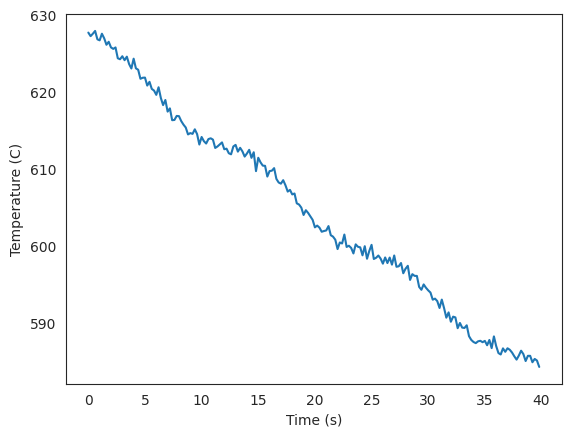

In [182]:
#16
plt.plot(t[:200],T[:200])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')

In [183]:
#17
# Sampling frequency (Hz)
fs = len(T)/Tmax
print(fs)

5.0


In [184]:
#18
# Compute FFT
fft_T = fft(T)
frequencies = fftfreq(len(T), d=1/fs)

In [185]:
#19
# Take only positive frequencies
freq_pos = frequencies[frequencies >= 0]
fft_Tmagn = np.abs(fft_T[frequencies >= 0]) / len(T)

Text(0.5, 1.0, 'Spectrum')

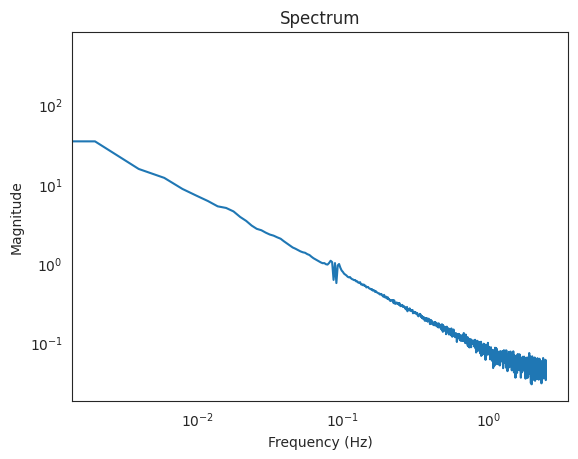

In [186]:
#20
# plot the specturm
plt.loglog(freq_pos, fft_Tmagn)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')

### Create a Butterworth filter - cutoff at 0.04 Hz

In [187]:
#21
sos = butter(N=10, Wn=0.04, btype='lowpass', fs=5, output='sos') # second-order section format
T_Butter = sosfiltfilt(sos, T)

Text(0, 0.5, 'Temperature (C)')

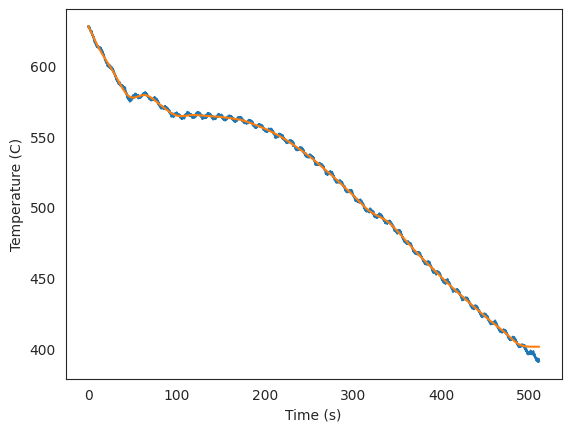

In [188]:
#22
plt.plot(t,T)
plt.plot(t,T_Butter)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')

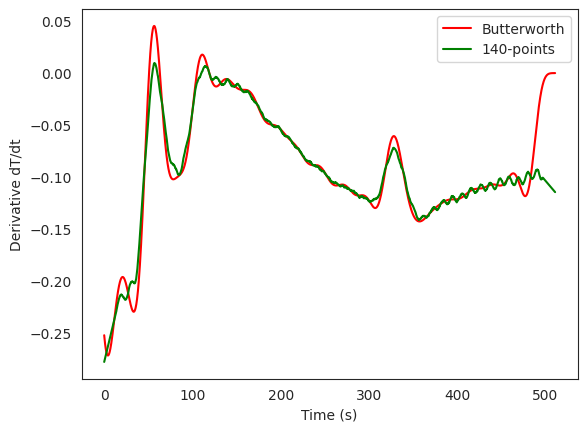

In [189]:
#23
dTdtf_Butter = savgol_filter(T_Butter, window_length=2, polyorder=1, deriv=1)

WL = 140
dTdtf = savgol_filter(T, window_length=WL, polyorder=2, deriv=1)

plt.plot(t, dTdtf_Butter, 'r', label='Butterworth')
plt.plot(t, dTdtf, 'g', label=f'{WL}-points')
plt.xlabel('Time (s)')
plt.ylabel('Derivative dT/dt')
plt.legend()

---
# Part 3: Linear and Non-Linear Regression

## 3.1 Linear Regression

Assume we have a set of data points $(x_i, y_i)$ for $i=1,\dots,n$.  
We want to approximate the relationship between $x$ and $y$ by a straight line

$$
y \approx ax + b,
$$

where $a$ is the slope and $b$ is the intercept.  
The parameters are chosen by the least-squares principle, i.e. by minimizing the **residual** (**objective**, **cost** or **merit** function)

$$
\mathcal{R} = \sum_{i=1}^n (y_i - ax_i - b)^2.
$$

The solution can be written using means, $\bar{x}, \bar{y}$, variance $\operatorname{Var}(x)$ and covariance $\operatorname{Cov}(x,y)$:

$$
a = \frac{\operatorname{Cov}(x,y)}{\operatorname{Var}(x)},
\qquad
b = \bar{y} - \bar{x}\frac{\operatorname{Cov}(x,y)}{\operatorname{Var}(x)}.
$$

## 3.2 The Arrhenius law

In many thermally activated processes in materials science and chemistry, the temperature dependence of a kinetic quantity can **often** be approximated by the Arrhenius law

$$
k(T) = k_0 \exp\!\left(-\frac{Q}{RT}\right),
$$

where $k(T)$ is the temperature-dependent quantity, $k_0$ is a pre-exponential factor, $Q$ is an activation energy, $R$ is the gas constant, and $T$ is the absolute temperature.

$k(T)$ could represent, for example:
- a reaction rate constant,
- a diffusion coefficient $D(T)$,
- a mobility or interface kinetics parameter,
- a viscosity-related rate parameter,
- or any other thermally activated kinetic measure.

In [190]:
#1
# Load the CSV file into Pandas DataFrame
df = pd.read_csv(base_url + 'Arrhenius_simple.csv')

In [191]:
#2
df.head(10)

,T,k
0,273.0000,0.001920
1,286.8163,0.001644
2,300.6327,0.009184
3,314.4490,0.018274
4,328.2653,0.000543
5,342.0816,0.013335
6,355.8980,0.067750
7,369.7143,0.086734
8,383.5306,0.160942
9,397.3469,0.143147


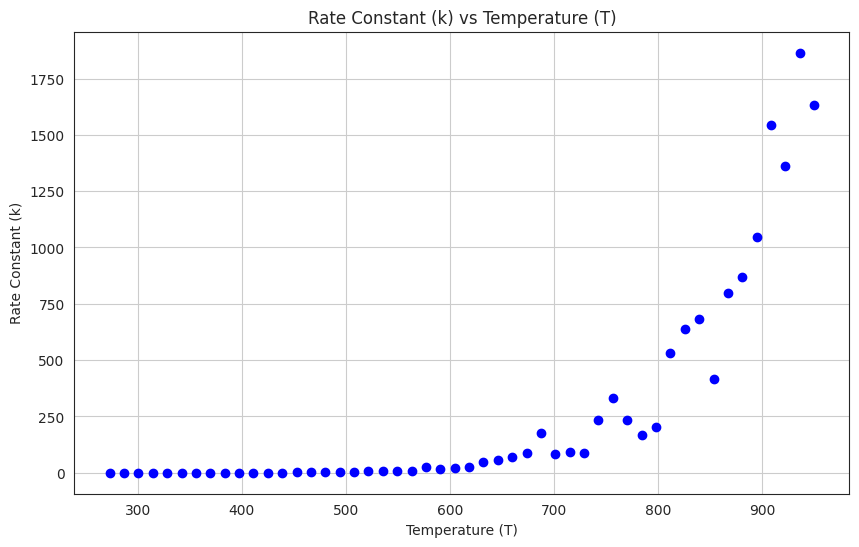

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['T'], df['k'], color='blue', marker='o')

plt.xlabel('Temperature (T)')
plt.ylabel('Rate Constant (k)')
plt.title('Rate Constant (k) vs Temperature (T)')
plt.grid(True)
plt.show()

---

#### Linearization

Taking the natural logarithm gives

$$
\ln k = \ln k_0 - \frac{Q}{R}\frac{1}{T}.
$$

This is a linear model of the form

$$
y \approx ax + b,
$$

by defining

$$
x = \frac{1}{T},
\qquad
y = \ln k.
$$

Thus, the slope and intercept are

$$
a = -\frac{Q}{R},
\qquad
b = \ln k_0.
$$

---

Given data points $(x_i, y_i)$ with $x_i = 1/T_i$ and $y_i = \ln k_i$, from the least-squares minimization we get $a$ and $b$.

From these, we recover the Arrhenius parameters:

$$
Q = -aR,
\qquad
k_0 = \exp(b).
$$

---

#### Note on interpretation

A good linear fit of $\ln k$ vs $1/T$ suggests that a single Arrhenius mechanism may be a reasonable description over the chosen temperature range. Systematic curvature often indicates that a more complex model is needed.

In [193]:
#3
T = df['T'].values
k = df['k'].values

In [194]:
#4
x, y = 1/T, np.log(k)

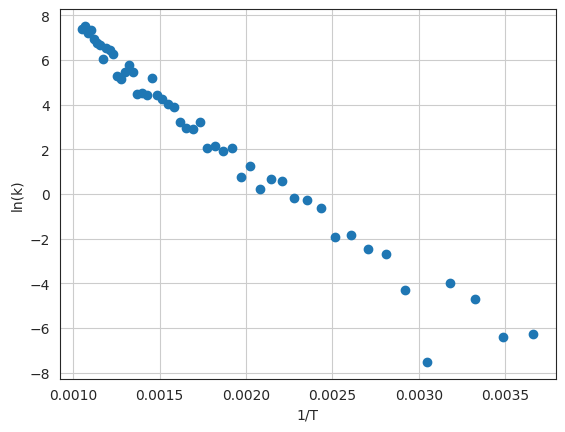

In [195]:
#5
plt.scatter(x,y)
plt.xlabel('1/T')
plt.ylabel('ln(k)')
plt.grid()

## 3.3 Linear regression in Python

There are many ways to perform linear regression in Python:

- **`linregress` from `scipy.stats`**  
  A convenient function for simple linear regression $y = ax + b$.   
  It works only with one predictor.   
  Returns also statistics such as:
  - correlation coefficient (`rvalue`)
  - standard error of the slope (`stderr`)
  - standard error of the intercept (`intercept_stderr`)

- **`polyfit` from `numpy`**  
  A general polynomial fitting tool; for a line - degree 1.  
  It returns:
  - polynomial coefficients (for degree 1: slope and intercept)  
  - the covariance matrix of the fitted coefficients
  - residuals

- **Direct calculation from **Pandas** data**  
  Having data stored in `DataFrame`, it’s easy to compute the least-squares slope and intercept directly using `.cov()` and `.var()`  

- **`LinearRegression` from `sklearn`**  
  A clean and scalable implementation for $y = ax + b$.  
  It provides:
  - attributes `coef_`, `intercept_`
  - method `.score()` for $R^2$  
  Advantage:
  - naturally extends into multivariate cases
  - integrates naturally with broader machine learning workflows.

- **`curve_fit` from `scipy.optimize`**  
  A flexible least-squares fitter for any parametric model.  
  It need to define a function, e.g. for a line `y = f(x, a, b) = ax + b`.
  - works for a general **nonlinear** problems  
  It returns:
  - best-fit parameters `popt`
  - parameter covariance matrix `pcov`  

- **`minimize` from `scipy.optimize`**  
  The most general approach.  
  You define any objective function you want, e.g.:
  - sum of squares, or any other norms as L$_1$, L$_n$   
  Advantage:
  - works for a general **nonlinear** problems
  - supports essentially any **user-defined residual**

#### Use of `scipy.stats.linregress`

In [196]:
#6
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

#### Use of `numpy.polyfit`

In [197]:
#7
coeffs = np.polyfit(x, y, deg=1)
slope, intercept = coeffs[0], coeffs[1]

#### Direct calculation using `.mean()`, `.cov()` `.var()` from `pandas`

In [198]:
#8
# Create linearized Arrhenius variables
df['inv_T'] = 1 / df['T']
df['log_k'] = np.log(df['k'])
# Slope from covariance
slope = df['inv_T'].cov(df['log_k']) / df['inv_T'].var()
intercept = df['log_k'].mean() - slope * df['inv_T'].mean()

#### Use of `sklearn.linear_model.LinearRegression`

In [199]:
#9
from sklearn.linear_model import LinearRegression
# must reshape x from 1D to 2D
x2D = x.reshape(len(x), 1)
#
model = LinearRegression()
model.fit(x2D, y)
#
slope = model.coef_
intercept = model.intercept_

#### Use of `scipy.optimize.curve_fit`

In [200]:
#10
from scipy.optimize import curve_fit

def fun_linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(fun_linear, x, y)
slope, intercept = popt

#### Use of `scipy.optimize.minimize`

In [201]:
#11
from scipy.optimize import minimize

def fun_residual(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    res = np.sum((y - y_pred)**2)
    return res

initial_guess = [0.0, 0.0]

result = minimize(fun_residual, initial_guess, args=(x, y), method='BFGS')
slope, intercept = result.x

In [202]:
#12
# Fitted line
y_fit = intercept + slope * x

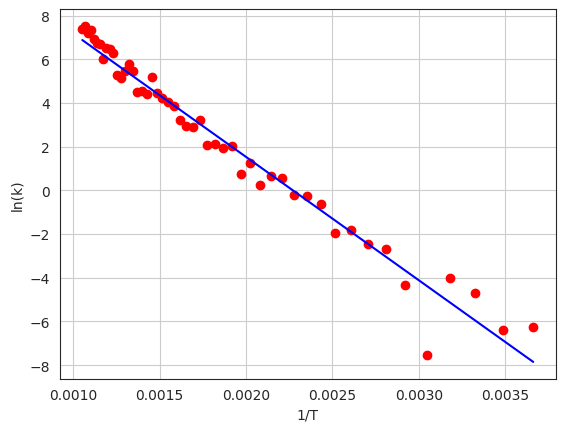

In [203]:
#13
# Plot
plt.scatter(x, y, c='r')
plt.plot(x, y_fit, 'b-')

plt.xlabel('1/T')
plt.ylabel('ln(k)')
plt.grid()

## 3.4 Confidence and prediction bands

After fitting a linear model to data $(x_i, y_i)$,

$$
y \approx ax + b,
$$

we often want to visualize the uncertainty around the fitted line $\hat{y}(x) = \hat{a}x + \hat{b}$.

There are two standard bands:

- **Confidence band:** uncertainty in the *estimated mean response* $E[y|x]$.
- **Prediction band:** uncertainty for a *new individual observation* at $x$ (mean uncertainty + scatter).

---

#### ... in the nutshell

Let $n$ be the number of data points and

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i,
\qquad
S_{xx} = \sum_{i=1}^n (x_i - \bar{x})^2.
$$

After fitting, at each $x_i$ we have residuals $e_i = y_i - \hat{y}(x_i)$, the residual standard error $s$ is

$$
s = \sqrt{\frac{\sum_{i=1}^n e_i^2}{n-2}}.
$$

The standard error of the fitted mean at $x$ is

$$
SE_{\text{mean}}(x) = s\sqrt{\frac{1}{n} + \frac{(x-\bar{x})^2}{S_{xx}}}.
$$

Let $t_{1-\alpha/2,\,n-2}$ be the $t$-critical value obtained using the $t$-distribution with $n-2$ degrees of freedom for the desired confidence level.


#### The $(1-\alpha)$ confidence band

$$
\hat{y}(x)\ \pm\ t_{1-\alpha/2,\,n-2}\, SE_{\text{mean}}(x).
$$

This band is typically **narrower** and answers:  
*"Where is the true average trend likely to be?"*

---

#### The $(1-\alpha)$ prediction band for a new observation

The standard error for a new observation at $x$ is

$$
SE_{\text{pred}}(x) = s\sqrt{1 + \frac{1}{n} + \frac{(x-\bar{x})^2}{S_{xx}}}.
$$

Thus, the $(1-\alpha)$ prediction band is

$$
\hat{y}(x)\ \pm\ t_{1-\alpha/2,\,n-2}\, SE_{\text{pred}}(x).
$$

This band is **wider** and answers:  
*"Where is a new data point likely to fall?"*

---

#### Practical interpretation

- The **confidence band** is about the *uncertainty of the mean line*
- A point inside the **prediction band** is likely consistent with the model at that $x$.    
- Both bands widen away from $\bar{x}$


In [204]:
#14
import scipy.stats as stats
# Calculate confidence band

n = len(x)
dof = n - 2  # Degrees of freedom
alpha = 0.05 # 95% confidence
t_val = stats.t.ppf(1-alpha/2, dof)  # 95% confidence (two-tailed)

# Residual standard error
residuals = y - y_fit
s = np.sqrt(np.sum(residuals**2) / dof)

# Mean of x
x_mean = np.mean(x)
sum_sq_x = np.sum((x - x_mean)**2)

# Standard error of the fit at each x
se_fit = s * np.sqrt(1/n + (x - x_mean)**2 / sum_sq_x)
se_pred = s * np.sqrt(1 + 1/n + (x - x_mean)**2 / sum_sq_x)

# Confidence band
margin = t_val * se_fit
upper_band_conf = y_fit + margin
lower_band_conf = y_fit - margin

# Prediction band
margin = t_val * se_pred
upper_band_pred = y_fit + margin
lower_band_pred = y_fit - margin

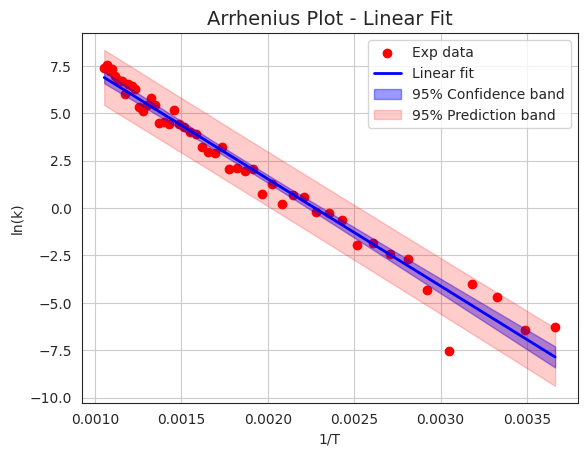

In [205]:
#15
# Plot
plt.scatter(x, y, c='r', label='Exp data')
plt.plot(x, y_fit, 'b-', lw=2, label='Linear fit')
# Confidence band
plt.fill_between(x, lower_band_conf, upper_band_conf, color='blue', alpha=0.4, label='95% Confidence band')
# Prediction band
plt.fill_between(x, lower_band_pred, upper_band_pred, color='red', alpha=0.2, label='95% Prediction band')

plt.xlabel('1/T')
plt.ylabel('ln(k)')
plt.title('Arrhenius Plot - Linear Fit', fontsize=14)
plt.legend()
plt.grid()

## 3.5 Non-Linear Regression: a modified Arrhenius

In many real systems, the temperature dependence of a kinetic quantity cannot be described well by a *simple* Arrhenius law with a constant prefactor. A commonly used extension is the **modified Arrhenius (Kooij) form**:

$$
k = A\,T^n \exp\!\left(-\frac{Q}{RT}\right),
$$

where $A$ is a pre-exponential factor, $n$ is a temperature exponent, $Q$ is an activation energy, $R$ is the gas constant, and $T$ is the absolute temperature.

Taking the logarithm gives

$$
\ln k = \ln A + n\ln T - \frac{Q}{R}\frac{1}{T}.
$$

This is not anymore a linear relationship between $\ln k$ and $\frac{1}{T}$.  
However, it can be treated as a linear **multivariate** regression with predictors $\ln T$ and $1/T$.

---

**1) Nonlinear least squares**

by minimizing residuals

$$
\min_{\ln A,n,Q}\ \sum_{i=1}^n \left[\ln k_i - \left(\ln A + n\ln T_i - \frac{Q}{RT_i}\right)\right]^2.
$$

We can use `curve_fit` or `minimize`.

---


In [206]:
#16
R = 8.134

def ln_arrhenius(T, lnA, n, Q):
    return lnA + n*np.log(T) - Q/(R*T)

# Initial guesses
p0 = (np.log(1e-10), 1.0, 50e3)

popt, pcov = curve_fit(ln_arrhenius, T, y, p0=p0, maxfev=10000)

lnA, n, Q = popt

y_fit_nonlin = ln_arrhenius(T, lnA, n, Q)

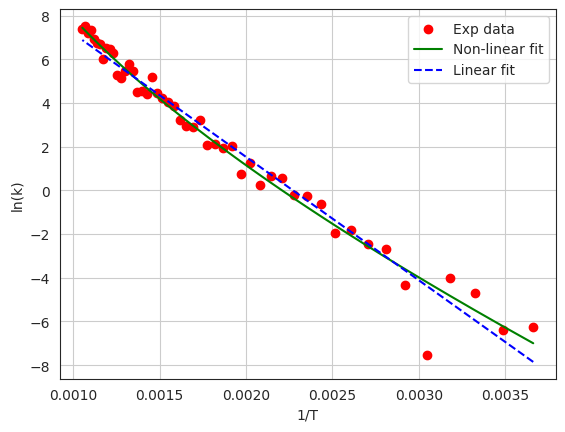

In [207]:
#17
# Plot
plt.scatter(x, y, c='r', label='Exp data')
plt.plot(x, y_fit_nonlin, 'g-', label='Non-linear fit')
plt.plot(x, y_fit, 'b--', label='Linear fit')
plt.xlabel('1/T')
plt.ylabel('ln(k)')
plt.legend()
plt.grid()

## 3.6 Confidence and prediction bands for non-linear fit

For a nonlinear model fitted to data $(x_i, y_i)$,

$$
y_i = f(x_i,\theta) + \varepsilon_i,
$$

can we visualize uncertainty around the fitted curve?

---

We need to compute the parameter gradient $g(x)$ (Jacobian)

$$
g(x) = \frac{\partial f(x,\theta)}{\partial \theta},
$$

and using the parameter covariance matrix from the fit, $\operatorname{Cov}(\theta)$, the standard error of the mean response can be calculated as

$$
SE_{\text{mean}}(x) = \sqrt{g(x)\,\operatorname{Cov}(\theta)\,g(x)^{T}}.
$$

Again, using the $t$-distribution with $(n-p)$ degrees of freedom (where $p=3$ is the number of parameters),

$$
\hat{y}(x)\ \pm\ t_{1-\alpha/2,\,n-p}\, SE_{\text{mean}}(x)
$$

gives a pointwise $(1-\alpha)$ **confidence band**.

---

#### Prediction band

The standard error for predicting a new individual observation at a given $x$ is

$$
SE_{\text{pred}}(x) = \sqrt{SE_{\text{mean}}(x)^2 + s^2},
$$

$$
s^2 = \frac{\sum_{i=1}^n (y_i - f(x_i,\hat{\theta}))^2}{n-p}
$$

and the $(1-\alpha)$ **prediction band** is

$$
\hat{y}(x)\ \pm\ t_{1-\frac{\alpha}{2},\,n-p}\, SE_{\text{pred}}(x).
$$


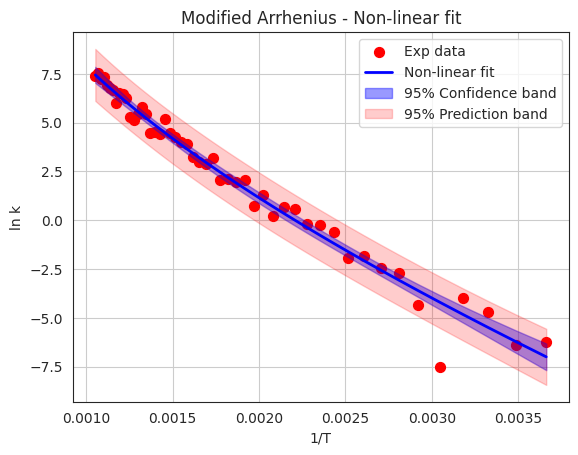

In [208]:
#18
# degrees of freedom
n_obs = len(x)
dof = n_obs - 3

# standard error
res = y - y_fit_nonlin
s2 = np.sum(res**2)/dof
s = np.sqrt(s2)

# Jacobian of f(T, theta) wrt theta
def jacobian(T):
    J = np.column_stack([np.ones_like(T), np.log(T), -1/(R*T)])
    return J

J = jacobian(T)
var_mean = np.einsum("ij,jk,ik->i", J, pcov, J)
se_mean = np.sqrt(var_mean)

# Variance for prediction adds residual variance
se_pred = np.sqrt(var_mean + s2)

# confidence interval
alpha = 0.05
tcrit = stats.t.ppf(1 - alpha/2, dof)

# Pointwise bands in ln-space
lower_band_conf = y_fit_nonlin - tcrit * se_mean
upper_band_conf = y_fit_nonlin + tcrit * se_mean

lower_band_pred = y_fit_nonlin - tcrit * se_pred
upper_band_pred = y_fit_nonlin + tcrit * se_pred


# plot
plt.scatter(x, y, 50, 'r', label='Exp data')
plt.plot(x, y_fit_nonlin, 'b-', lw=2, label='Non-linear fit')
# Confidence band
plt.fill_between(x, lower_band_conf, upper_band_conf, color='blue', alpha=0.4, label='95% Confidence band')
# Prediction band
plt.fill_between(x, lower_band_pred, upper_band_pred, color='red', alpha=0.2, label='95% Prediction band')

plt.xlabel("1/T")
plt.ylabel("ln k")
plt.title("Modified Arrhenius - Non-linear fit")
plt.legend()
plt.grid()

## 3.7 Linear multi-variate regression

In **multivariate (multiple) linear regression**, we model a response $y$ using several predictors:

$$
y_i \approx \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}.
$$

In matrix form:

$$
\mathbf{y} \approx \mathbf{X}\boldsymbol{\beta},
$$

where $\mathbf{X}$ is the design matrix (first column typically ones).  
The least-squares solution minimizes $||\mathbf{y}-\mathbf{X}\boldsymbol{\beta}||^2$ and is given by

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.
$$

---

#### Modified Arrhenius via linear multivariate regression

The **modified Arrhenius (Kooij) form** is

$$
k = A\,T^n \exp\!\left(-\frac{Q}{RT}\right).
$$

Taking the logarithm:

$$
\ln k = \ln A + n\ln T - \frac{Q}{R}\frac{1}{T}.
$$

This becomes a **multivariate linear regression** problem by defining:

$$
y_i = \ln k_i,
\qquad
x_{i1} = \ln T_i,
\qquad
x_{i2} = \frac{1}{T_i}.
$$

Hence, the model is

$$
y \approx \beta_0 + \beta_1 x_{1} + \beta_2 x_{2},
$$

---

Let's take a similar form of the Arrhenius equation,

$$
k(T,p) = A\, p^m \exp\!\left(-\frac{Q}{RT}\right),
$$

used widely for thermally activated processes such as **gas-phase reactions** or **surface reactions**, when the measured rate depends not only on temperature but also on the **partial pressure** of a reactive species.

Taking the natural logarithm:

$$
\ln k = \ln A + m \ln p - \frac{Q}{R}\frac{1}{T}.
$$

This is linear in the parameters when we define:

$$
y = \ln k,
\qquad
x_1 = \ln p
\qquad
x_2 = \frac{1}{T}.
$$

So the regression model becomes:

$$
y \approx \beta_0 + \beta_1 x_1 + \beta_2 x_2,
$$

with:

$$
\beta_0 = \ln A,
\qquad
\beta_1 = m,
\qquad
\beta_2 = -\frac{Q}{R}.
$$

After fitting, we get model parameters as:

$$
A = \exp(\beta_0),
\qquad
m = \beta_1,
\qquad
Q = -R\beta_2.
$$

---

Construct the design matrix:

$$
\mathbf{X} =
\begin{bmatrix}
1 & \ln T_1 & 1/T_1 \\
1 & \ln T_2 & 1/T_2 \\
\vdots & \vdots & \vdots \\
1 & \ln T_n & 1/T_n
\end{bmatrix},
\qquad
\mathbf{y} =
\begin{bmatrix}
\ln k_1 \\
\ln k_2 \\
\vdots \\
\ln k_n
\end{bmatrix}.
$$

and solve:

$$
\boldsymbol{\beta} =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{bmatrix} =
(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.
$$

In [209]:
#19
# Read the data from CSV
df = pd.read_csv(base_url+'Arrhenius_pressure.csv')

# Extract columns
T = df['T'].values
p = df['p'].values
k = df['k'].values

# Transform data for linearization
# Model: ln(k) = ln(A) + m*ln(p) - (Q/R)*(1/T)
y = np.log(k)
x1 = np.log(p)
x2 = 1/T

# Stack features into matrix X
X = np.column_stack([x1, x2])

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Extract parameters
beta0 = model.intercept_
beta1, beta2 = model.coef_

# Convert coefficients back to physical parameters
A_hat = np.exp(beta0)   # A = exp(intercept)
m_hat = beta1           # m = coeff of ln(p)
Q_hat = -beta2 * R      # Q = - (coeff of 1/T) * R

# Print results
print("Regression Results:")
print(f"Pre-exponential factor (A_hat): {A_hat:.3e}")
print(f"Pressure exponent (m_hat):      {m_hat:.4f}")
print(f"Activation energy (Q_hat):      {Q_hat:.2f} J/mol")

Regression Results:
Pre-exponential factor (A_hat): 4.518e+03
Pressure exponent (m_hat):      0.5829
Activation energy (Q_hat):      82704.51 J/mol


---
# Part 4: 3D Plotting

## 4.1  3D Scatter and Surface Plot

In [210]:
#1
from mpl_toolkits.mplot3d import Axes3D

# Build a grid in (T, p)
Tg = np.linspace(T.min(), T.max(), 100)
pg = np.linspace(p.min(), p.max(), 100)

TT, PP = np.meshgrid(Tg, pg)

# Predict on the grid using the linear model in log-space
X1 = np.log(PP).flatten()
X2 = (1/TT).flatten()
X = np.column_stack([X1, X2])

lnKK = model.predict(X).reshape(TT.shape)
KK = np.exp(lnKK)

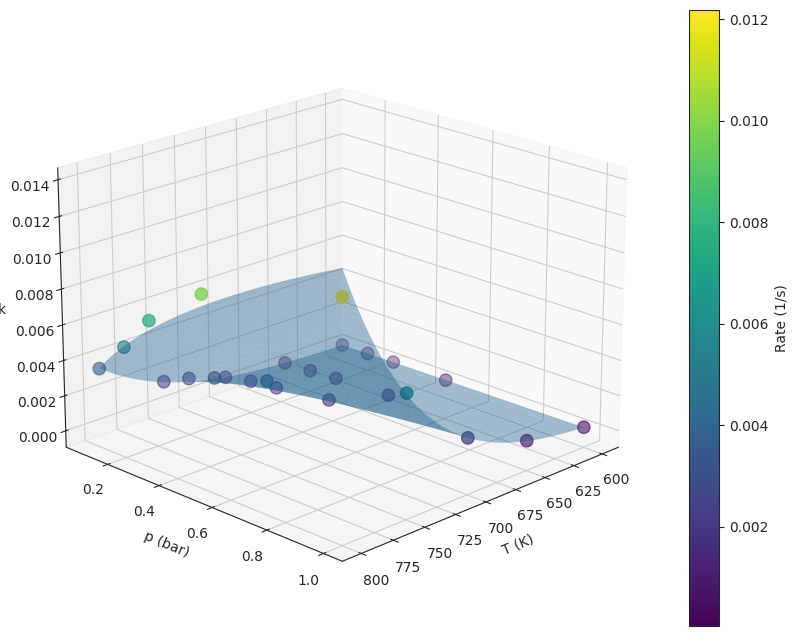

In [211]:
#2
# 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter of measured/synthetic data
scatter = ax.scatter(T, p, k, c=k, s=80, marker="o", cmap='viridis', label="data")

# Fitted surface
ax.plot_surface(TT, PP, KK, alpha=0.4, edgecolor='none')

ax.set_xlabel("T (K)")
ax.set_ylabel("p (bar)")
ax.set_zlabel("k")

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Rate (1/s)')
ax.view_init(elev=20, azim=45)

## 4.2  Contour Plots

Text(0.5, 0, 'T (K)')

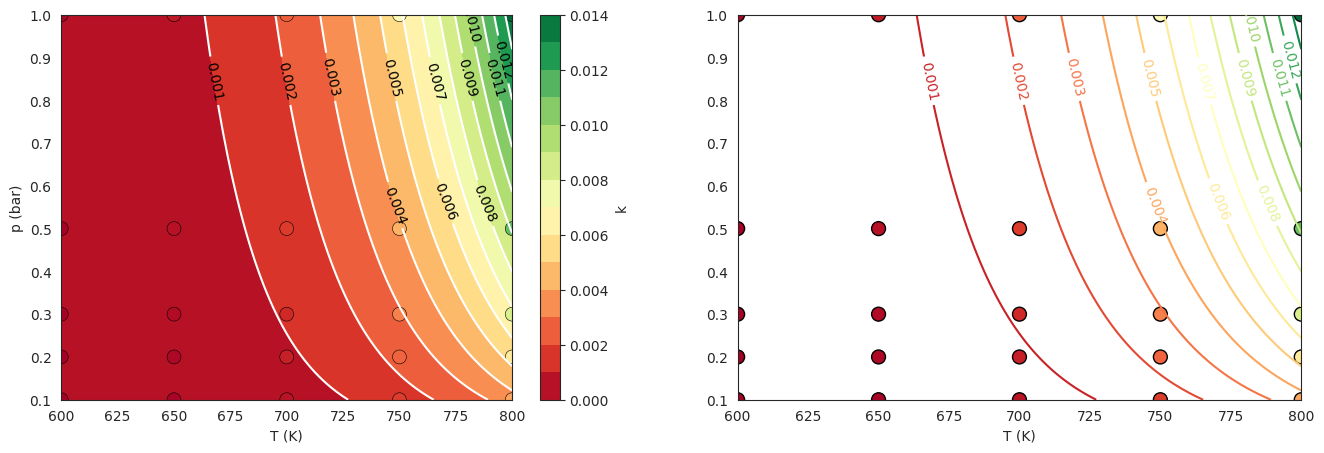

In [212]:
#3
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1) Filled contour
ax = axes[0]
cf = ax.contourf(TT, PP, KK, cmap="RdYlGn", levels=16)
cs = ax.contour(TT, PP, KK, colors="white", levels=16)
ax.clabel(cs, inline=True, fontsize=10, colors='black')
sc = ax.scatter(T, p, c=k, s=100, marker="o", cmap="RdYlGn", edgecolors="k", linewidths=0.4)
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label("k")

ax.set_xlabel("T (K)")
ax.set_ylabel("p (bar)")

# 2) Contour lines
ax = axes[1]
cs = ax.contour(TT, PP, KK, cmap="RdYlGn", levels=16)
ax.clabel(cs, inline=True, fontsize=10)
ax.scatter(T, p, c=k, s=100, marker="o", cmap="RdYlGn", edgecolors="k")
ax.set_xlabel("T (K)")

# Part 5. Exploring Variability - Error Bars, Histograms, and Violin Plots

This dataset contains measurements of **grain size**, **Vickers hardness** and **temperature** for steel samples subjected to different heat treatments:

- `Sample_ID`: Unique sample identifier  
- `Heat_Treatment`: Annealed, Quenched, Normalized, Cold_Rolled  
- `Grain_Size_um`: Grain size in micrometers  
- `Hardness_HV`: Vickers hardness  
- `Measurement_Batch`: Batch number  
- `Temperature_C`: Heat treatment temperature

Our goal is to **explore variability** in grain size and related variables across treatments using `seaborn`
- **Histograms**
- **Kernel density estimates (KDE)** (smooth distribution estimates)
- **Violin plots**
- **2D-Histograms**
- **`pairplot` and `jointplot`**

In [213]:
#1
df = pd.read_csv(base_url + 'metal_grain_size_distribution.csv')

In [214]:
#2
df.head()

,Sample_ID,Heat_Treatment,Grain_Size_um,Temperature_C,Measurement_Batch,Hardness_HV
0,A000,Annealed,52.98,907.41,4,285.14
1,A001,Annealed,49.17,915.28,1,271.44
2,A002,Annealed,53.89,888.81,3,260.50
3,A003,Annealed,59.14,904.50,5,279.16
4,A004,Annealed,48.60,894.79,3,289.77


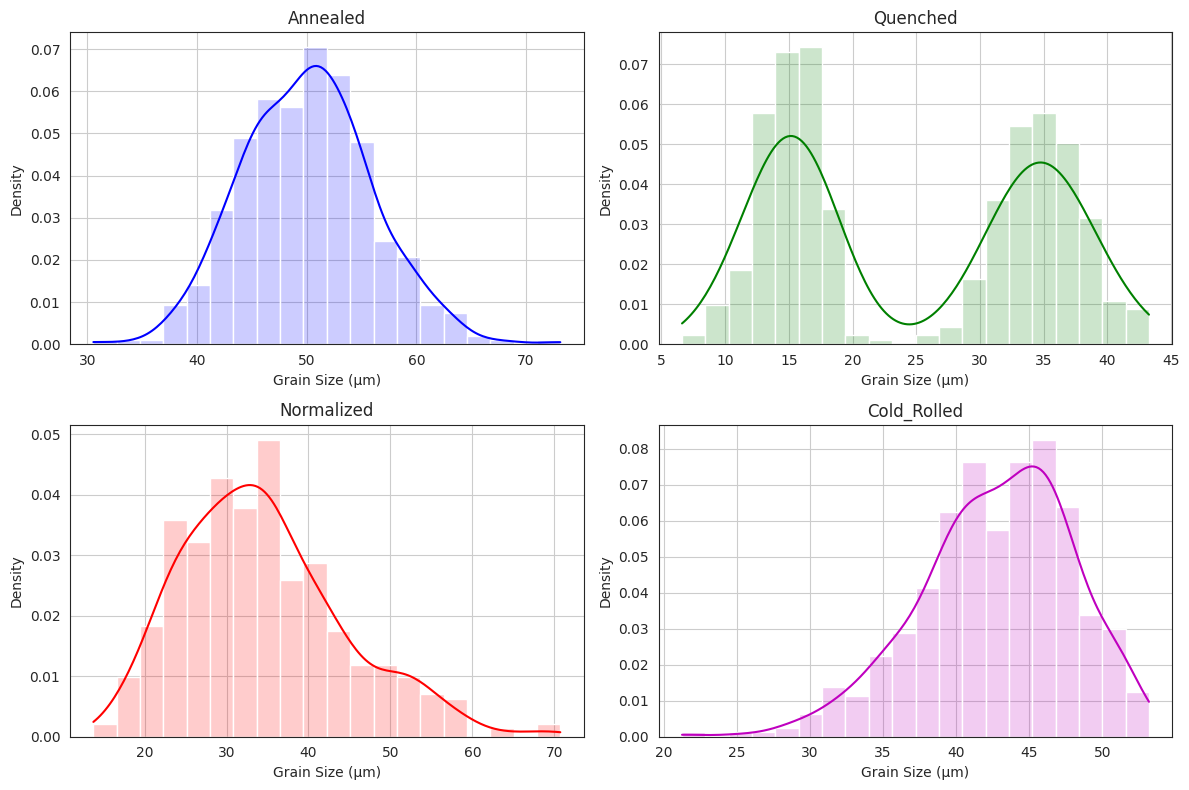

In [215]:
#3
plt.figure(figsize=(12, 8))

treatments = ['Annealed', 'Quenched', 'Normalized', 'Cold_Rolled']
colors = ['b', 'g', 'r', 'm']

for i, treat in enumerate(treatments):
    ax = plt.subplot(2, 2, i + 1)

    # get grain size for a given heat treatment
    subset = df[df['Heat_Treatment'] == treat]['Grain_Size_um']

    # Histogram
    sns.histplot(subset, bins=20, stat='density', alpha=0.2, color=colors[i], kde=True)

    # KDE
    #sns.kdeplot(subset, color=colors[i], bw_method='scott')

    ax.set_title(treat)
    ax.set_xlabel('Grain Size (μm)')
    ax.set_ylabel('Density')
    ax.grid()

plt.tight_layout()

Text(0.5, 1.0, 'Grain Size Distribution by Heat Treatment')

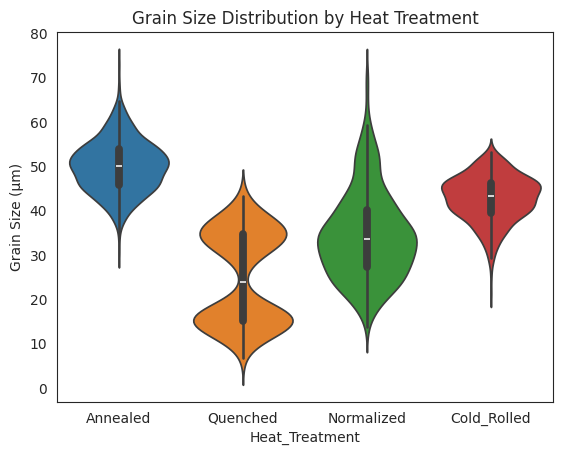

In [216]:
#4
sns.violinplot(data=df,
               x='Heat_Treatment',
               y='Grain_Size_um',
               bw_method='scott',
               hue='Heat_Treatment')

plt.ylabel('Grain Size (μm)')
plt.title('Grain Size Distribution by Heat Treatment')

#### What do we see inside a Violin Plot

* The White line is the Median

* The Box gives Interquartile Range (IQR) - spans from 25th (Q1) to 75th (Q3) percentile

* The Lines (Whiskers) define outliers - spans between Q1−1.5×IQR and Q3+1.5×IQR

* The Violin Shape is given by KDE

Text(0.5, 1.0, 'rain Size Distribution by Heat Treatment')

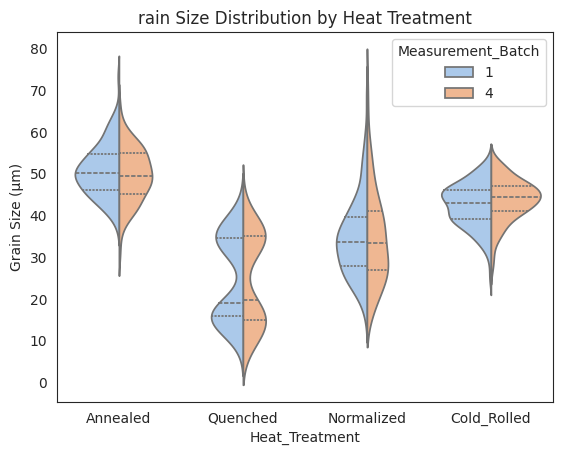

In [217]:
#5
df_filtered = df[df['Measurement_Batch'].isin([1, 4])]

sns.violinplot(data=df_filtered,
               x='Heat_Treatment',
               y='Grain_Size_um',
               hue='Measurement_Batch',
               bw_method='scott',
               split=True,
               inner='quart', # 'box', 'point', 'stick'
               palette='pastel')

plt.ylabel('Grain Size (μm)')
plt.title('rain Size Distribution by Heat Treatment')

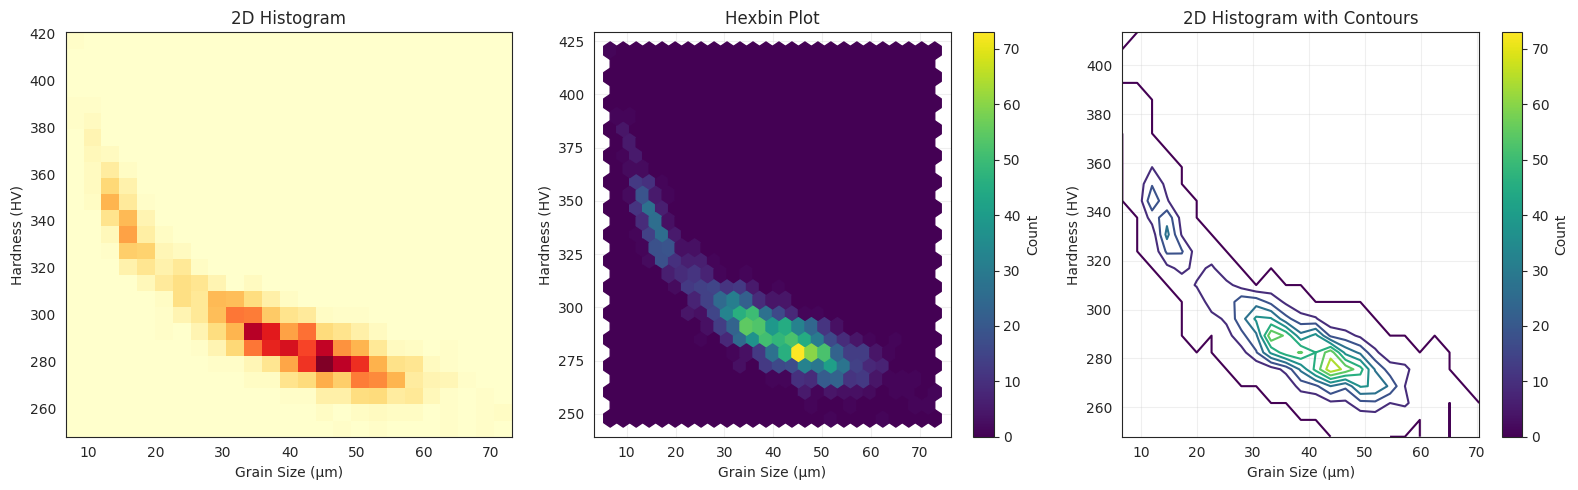

In [218]:
#6
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

# 2D histogram with color intensity
h = ax[0].hist2d(df['Grain_Size_um'], df['Hardness_HV'], bins=25, cmap='YlOrRd')
ax[0].set_xlabel('Grain Size (μm)')
ax[0].set_ylabel('Hardness (HV)')
ax[0].set_title('2D Histogram')
ax[0].grid(alpha=0.3)

# Hexbin plot
hb = ax[1].hexbin(df['Grain_Size_um'], df['Hardness_HV'], gridsize=25, cmap='viridis')
ax[1].set_xlabel('Grain Size (μm)')
ax[1].set_ylabel('Hardness (HV)')
ax[1].set_title('Hexbin Plot')
ax[1].grid(True, alpha=0.3)
plt.colorbar(hb, ax=ax[2], label='Count')

# 2D histogram with contours
ax[2].contour(h[1][:-1], h[2][:-1], h[0].T, cmap='viridis')
ax[2].set_xlabel('Grain Size (μm)')
ax[2].set_ylabel('Hardness (HV)')
ax[2].set_title('2D Histogram with Contours')
ax[2].grid(True, alpha=0.3)
plt.colorbar(hb, ax=ax[1], label='Count')

plt.tight_layout()

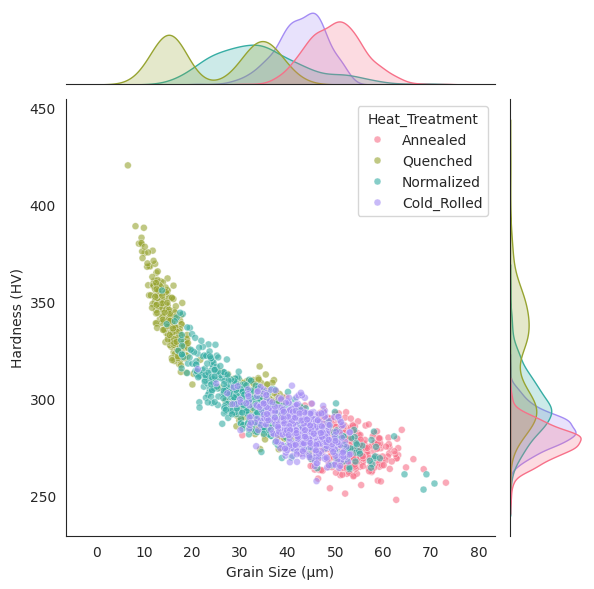

In [219]:
#7
g = sns.jointplot(
    data=df,
    x='Grain_Size_um',
    y='Hardness_HV',
    hue='Heat_Treatment',
    kind='scatter',          # 'reg', 'hist', 'hex', 'scatter', 'kde'
    palette='husl',
    alpha=0.6,
    s=25,
)
g.set_axis_labels('Grain Size (μm)', 'Hardness (HV)')

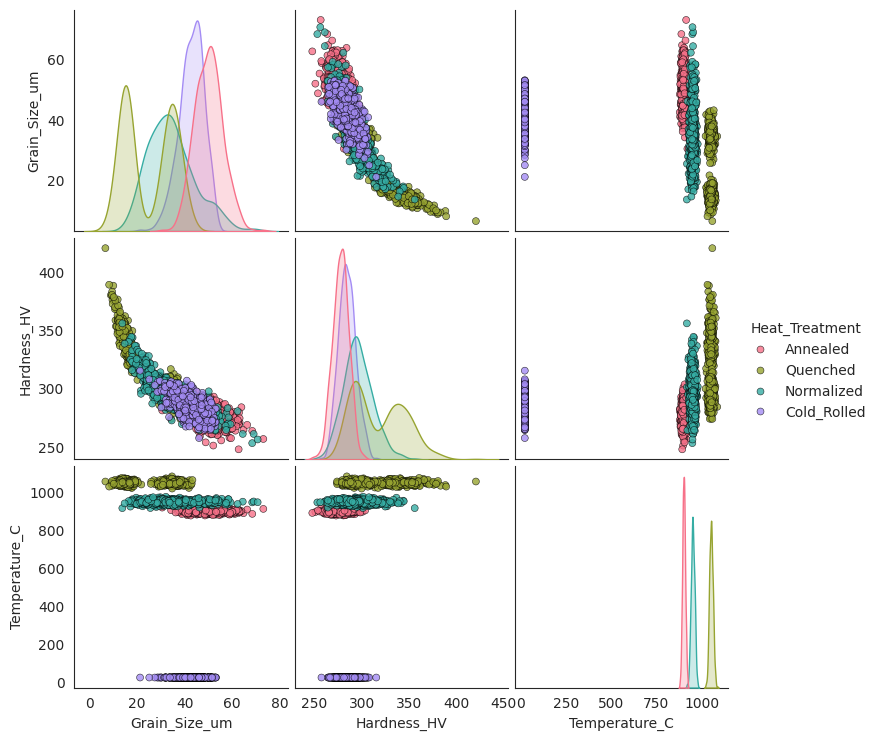

In [220]:
#8
vars_to_plot = ['Grain_Size_um', 'Hardness_HV', 'Temperature_C']
sns.set_style("white")  # no grid

g = sns.pairplot(
    data=df,
    vars=vars_to_plot,
    hue='Heat_Treatment',
    diag_kind='kde',
    plot_kws={'alpha': 0.8, 's': 25, 'edgecolor': 'black'},
    palette='husl'
)